In [16]:
import numpy as np

In [17]:
from scipy import misc
im = misc.face(gray=True)

In [18]:
m, n = im.shape
r=150
#epsilon iid suivant une N(0,1) (sigma = 1 => beta = 1)
beta = 20
# On fixe a et b arbitrairement comme dit sur le paper :
prior_gamma_params={"alpha":1, "beta": 1}

In [20]:
noise = np.random.normal(loc=0,scale=beta,size=(m,n))
noisy_im = im + noise

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
def plot_image(image, title=None):
    plt.figure(figsize=(9,12))
    plt.title(title)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
    plt.colorbar()
    plt.show()

In [23]:
centered_im=im-np.mean(im)

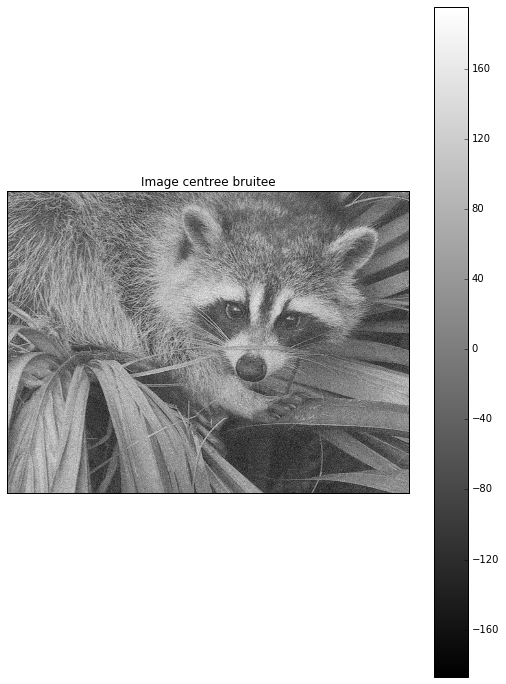

In [24]:
noisy = centered_im + noise
plot_image(noisy, "Image centree bruitee")

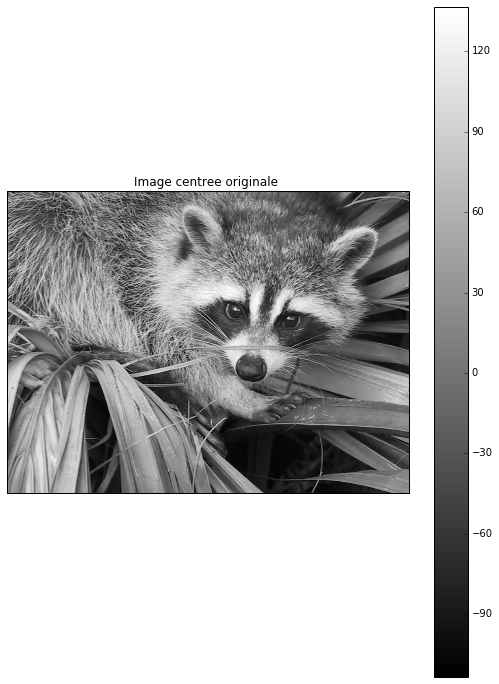

In [25]:
plot_image(centered_im, "Image centree originale ")

In [26]:
A_gen = np.random.normal(loc=0,scale=10,size=(m, r))
B_gen = np.random.normal(loc=0,scale=10,size=(n, r))

In [27]:
def get_gamma_param(A, B, a, b, A_mean, B_mean, Sigma_a, Sigma_b, col_num):
    m=A.shape[0]
    n=B.shape[0]
    m_a= A_mean[:,col_num].T.dot(A_mean[:,col_num]) + m* Sigma_a[col_num,col_num]
    m_b= B_mean[:,col_num].T.dot(B_mean[:,col_num]) + m* Sigma_b[col_num,col_num]
    alpha = a+(m+n)/2.*r
    beta = (2*b + m_a + m_b)/2
    return alpha, beta

In [28]:
#initialiser A et B
A = np.random.normal(loc=0,scale=1,size=(m, r))
B = np.random.normal(loc=0,scale=1,size=(n, r))
Gamma = np.diag(np.array([1./x for x in np.random.gamma(prior_gamma_params["alpha"], prior_gamma_params["beta"], r)]))
#initialiser les moyennes par les valeurs initiales
B_mean = B 
A_mean = A
#initialiser Sigma_b comme l'identité :
Sigma_b = np.identity(r)


In [ ]:
import scipy
max_step = 100
err_ori = np.zeros(max_step)
err_noisy = np.zeros(max_step)
for step in range(max_step):
    err_ori[step] = np.linalg.norm(A_mean.dot(B_mean.T)-centered_im)
    err_noisy[step] = np.linalg.norm(A_mean.dot(B_mean.T)-noisy)
    print "-"*30
    print "itération nº",step
    print "-"*20
    print "Erreurs :"
    print "Par rapport à la matrice d'origine : ", err_ori[step]
    print "Par rapport à la matrice bruitée : ", err_noisy[step]
    for i in range(m):
        #calcul de la variance
        Sigma_a = prior_gamma_params["beta"]*np.linalg.inv((B_mean.T).dot(B_mean)+ Gamma)
        mean_a_line = prior_gamma_params["beta"]* Sigma_a.dot(B_mean.T).dot(noisy[i,:].T)
        A[i,:] = np.random.multivariate_normal(mean_a_line,Sigma_a)
        #Mise à jour de la moyenne
        A_mean[i] = mean_a_line
    
    for j in range(n):
        Sigma_b = prior_gamma_params["beta"]*np.linalg.inv((A_mean.T).dot(A_mean)+ Gamma)
        mean_b_line = prior_gamma_params["beta"]* Sigma_b.dot(A_mean.T).dot(noisy[:,j].T)
        B[j,:] = np.random.multivariate_normal(mean_b_line,Sigma_b)
        #Mise à jour de la moyenne
        B_mean[j] = mean_b_line
    for k in range(r):
        alpha, beta= get_gamma_param(
            A, B, prior_gamma_params["alpha"], prior_gamma_params["beta"],A_mean,B_mean, Sigma_a, Sigma_b, k)
        Gamma[k,k] = 1./np.random.gamma(alpha, 1./beta)    

print "step",step+1,":", np.linalg.norm(A_mean.dot(B_mean.T)-centered_im)
    

------------------------------
itération nº 0
--------------------
Erreurs :
Par rapport à la matrice d'origine :  49716.9919758
Par rapport à la matrice bruitée :  52759.4241831
------------------------------
itération nº 1
--------------------
Erreurs :
Par rapport à la matrice d'origine :  17834.5869518
Par rapport à la matrice bruitée :  20935.3862068
------------------------------
itération nº 2
--------------------
Erreurs :
Par rapport à la matrice d'origine :  13746.0375853
Par rapport à la matrice bruitée :  16545.740379
------------------------------
itération nº 3
--------------------
Erreurs :
Par rapport à la matrice d'origine :  13239.6030064
Par rapport à la matrice bruitée :  15950.9658255
------------------------------
itération nº 4
--------------------
Erreurs :
Par rapport à la matrice d'origine :  13074.1936391
Par rapport à la matrice bruitée :  15764.3271611
------------------------------
itération nº 5
--------------------
Erreurs :
Par rapport à la matrice d'or

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(12,6))
plt.semilogy(range(1, len(err_ori)+1), err_ori)
plt.xlim(1,len(err_ori)+1)
plt.title("Comparaison de convergence")

In [ ]:
reconstructed_image = A_mean.dot(B_mean.T)

In [ ]:
plot_image(reconstructed_image, "Image reconstruite")

In [ ]:
np.linalg.norm(A.dot(B.T)-X_gen)

In [ ]:
mean_a_line.shape, Sigma_a.shape

In [42]:
np.min(Sigma_a)

0.0

In [26]:
mean_a_line[i] = V

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [4]:
X=np.zeros((m,n))
cols_to_fill=np.random.choice(n,r,replace=False)
for k in cols_to_fill:
    X[:,k]=np.random.normal(0,1,m)
for k in (set(range(n))-set(cols_to_fill)):
    rand_coefs = np.random.normal(0,1,r)
    X[:,k]=sum([X[:,cols_to_fill[i]]*rand_coefs[i] for i in range(r)])

In [5]:
mean_a

array([[  0.92284887,  -2.47007301,  -2.10590224, ...,  -1.58812097,
          3.05882318,  -0.30392471],
       [  5.12940119,  -0.44404491,  -3.0105268 , ...,   0.23829583,
          1.24466971,  -2.93559611],
       [ -2.97957144,   0.53661026,  -1.47360067, ...,   1.66889876,
          0.13199076,  -2.01840337],
       ..., 
       [ -6.65860565,   2.94412603,  -0.92336414, ...,  -1.41649424,
         -2.74000717,   1.95974028],
       [  3.89330264,   0.84279169,   1.09092452, ...,  -0.72211154,
          5.96339864,  -2.33928196],
       [  6.2822498 ,   2.42412484,   4.94979749, ...,  -0.3605845 ,
         -2.21448133,  10.24788361]])

In [6]:
p=0.3
n_known_coefs=int(p*m*n)
pick_coefs=np.random.choice(m*n, n_known_coefs, replace=False)
known_coefs = [(i%m, i/m) for i in pick_coefs]

In [7]:
#Initialisation
#Les matrices et paramètres
A=np.zeros((m,r))
B=np.zeros((n,r))
gamma=np.random.normal(0,1,r)
beta=.1

In [8]:
#Initialisation de Sigma
Sigma_A = [np.linalg.inv(np.diag(gamma[i])) for i in range(r)]
for i in range(m):
    mean = 
    A[i] = np.random.multivariate_normal

SyntaxError: invalid syntax (<ipython-input-8-e1a37ca03106>, line 4)